In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import statsmodels.api as sm

In [3]:
df = pd.read_csv('Housing.csv')
df = df.drop(columns=['furnishingstatus'])

In [4]:
numeric_columns = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
for column in numeric_columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')

boolean_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for column in boolean_columns:
    df[column] = df[column].map({'yes': 1, 'no': 0})


In [5]:
df_encoded = pd.get_dummies(df, drop_first=True)
print(df_encoded)
df_encoded.info()

        price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0    13300000  7420         4          2        3         1          0   
1    12250000  8960         4          4        4         1          0   
2    12250000  9960         3          2        2         1          0   
3    12215000  7500         4          2        2         1          0   
4    11410000  7420         4          1        2         1          1   
..        ...   ...       ...        ...      ...       ...        ...   
540   1820000  3000         2          1        1         1          0   
541   1767150  2400         3          1        1         0          0   
542   1750000  3620         2          1        1         1          0   
543   1750000  2910         3          1        1         0          0   
544   1750000  3850         3          1        2         1          0   

     basement  hotwaterheating  airconditioning  parking  prefarea  
0           0                0            

In [6]:
df_encoded.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea'],
      dtype='object')

In [7]:
X = df_encoded['area']
y = df_encoded['price']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     218.9
Date:                Fri, 21 Jun 2024   Prob (F-statistic):           7.39e-42
Time:                        17:10:08   Log-Likelihood:                -8551.2
No. Observations:                 545   AIC:                         1.711e+04
Df Residuals:                     543   BIC:                         1.712e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.387e+06   1.74e+05     13.681      0.0

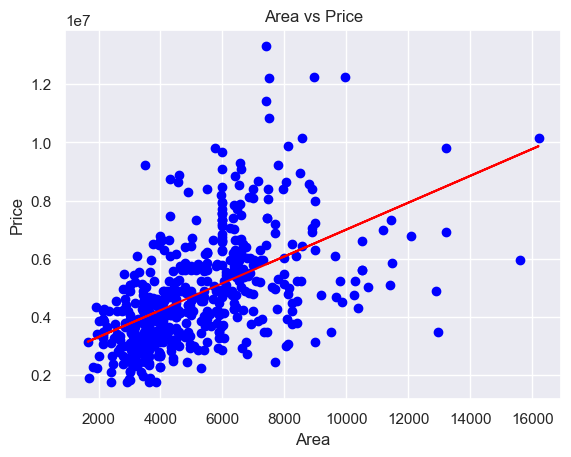

In [8]:
plt.scatter(df['area'], df['price'], color='blue')
plt.plot(df['area'], model.predict(X), color='red')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Area vs Price')
plt.show()

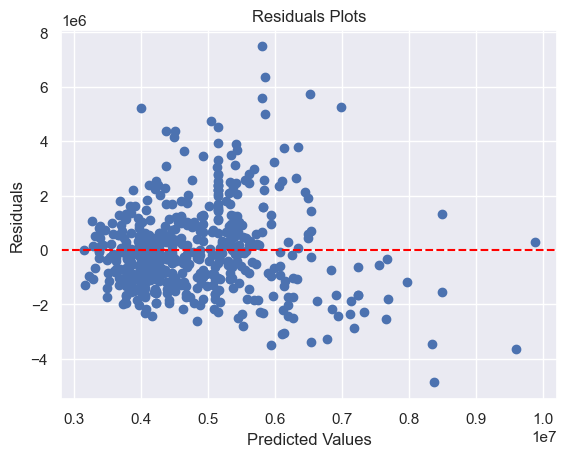

In [9]:
residuals = df_encoded['price'] - model.predict(X)

plt.scatter(model.predict(X), residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plots')
plt.show()

In [10]:
df_encoded = pd.get_dummies(df, drop_first=True)
print(df_encoded.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   price            545 non-null    int64
 1   area             545 non-null    int64
 2   bedrooms         545 non-null    int64
 3   bathrooms        545 non-null    int64
 4   stories          545 non-null    int64
 5   mainroad         545 non-null    int64
 6   guestroom        545 non-null    int64
 7   basement         545 non-null    int64
 8   hotwaterheating  545 non-null    int64
 9   airconditioning  545 non-null    int64
 10  parking          545 non-null    int64
 11  prefarea         545 non-null    int64
dtypes: int64(12)
memory usage: 51.2 KB
None


In [11]:
X1 = df_encoded.drop('price', axis=1)
y1 = df_encoded['price']
X1 = sm.add_constant(X1)
model = sm.OLS(y1, X1).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     99.81
Date:                Fri, 21 Jun 2024   Prob (F-statistic):          1.01e-121
Time:                        17:10:09   Log-Likelihood:                -8338.8
No. Observations:                 545   AIC:                         1.670e+04
Df Residuals:                     533   BIC:                         1.675e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -2.831e+05   2.39e+05     

In [12]:
new_data = pd.DataFrame({
    'const': [1, 1],  # Constant term
    'area': [7500, 5000],
    'bedrooms': [3, 2],
    'bathrooms': [2, 1],
    'stories': [2, 1],
    'mainroad': [1, 0],
    'guestroom': [0, 1],
    'basement': [1, 0],
    'hotwaterheating': [0, 0],
    'airconditioning': [1, 1],
    'parking': [2, 1],
    'prefarea': [0, 1]
})

# Predict prices using the trained model
predicted_prices = model.predict(new_data)
display(predicted_prices)

0    7.215508e+06
1    4.831582e+06
dtype: float64